In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from volatility import GARCH_MIDAS
from weights import beta_

In [2]:
df = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Stocks/AMD.csv')
df['Unnamed: 0'] = df['Unnamed: 0'].astype("datetime64[ms]")
df = df.rename(columns = {"Unnamed: 0": 'Date', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
df['LogReturn'] = np.log(df.Close).diff().fillna(0)*10
df['Volatility'] = df['LogReturn'] ** 2.0
df = df.iloc[1023:3019, :]
df.set_index(df.Date, inplace = True)

vix = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/VIXCLS.csv')
vix = vix[vix.VIXCLS != '.'].reset_index(drop=True)
vix['DATE'] = vix['DATE'].astype("datetime64[ms]")
vix = vix.rename(columns = {'DATE': 'Date', 'VIXCLS': 'VIX'})
vix = vix[(vix.Date >= df.Date.min()) & (vix.Date <= df.Date.max())]
vix['VIX'] = vix['VIX'].astype('float64')
vix.set_index(vix.Date, inplace = True)

cfnai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
cfnai = cfnai[cfnai.CFNAI != '.'].reset_index(drop = True)
cfnai['DATE'] = cfnai['DATE'].astype('datetime64[ms]')
cfnai = cfnai.rename(columns = {'DATE': 'Date', 'CFNAI': 'NAI'})
cfnai = cfnai[(cfnai.Date >= df.Date.min()) & (cfnai.Date <= df.Date.max())]
cfnai['NAI'] = cfnai['NAI'].astype('float64')
cfnai.set_index(cfnai.Date, inplace = True)

indpro = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/INDPRO.csv')
indpro = indpro[indpro.Value != '.'].reset_index(drop = True)
indpro['Date'] = indpro['Date'].astype('datetime64[ms]')
indpro = indpro.rename(columns = {'Date': 'Date', 'Value': 'IND'})
indpro = indpro[(indpro.Date >= df.Date.min()) & (indpro.Date <= df.Date.max())]
indpro['IND'] = indpro['IND'].astype('float64')
indpro['IND'] = np.log(indpro.IND).diff().fillna(0.0)
indpro.set_index(indpro.Date, inplace = True)

ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi = ppi[ppi.Value != '.'].reset_index(drop = True)
ppi['Date'] = ppi['Date'].astype('datetime64[ms]')
ppi = ppi.rename(columns = {'Date': 'Date', 'Value': 'PPI'})
ppi = ppi[(ppi.Date >= df.Date.min()) & (ppi.Date <= df.Date.max())]
ppi['PPI'] = ppi['PPI'].astype('float64')
ppi['PPI'] = np.log(ppi['PPI']).diff().fillna(0.0)
ppi.set_index(ppi.Date, inplace = True)

houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
houst = houst[houst.HOUST != '.'].reset_index(drop = True)
houst['DATE'] = houst['DATE'].astype('datetime64[ms]')
houst = houst.rename(columns = {'DATE': 'Date', 'HOUST': 'HST'})
houst = houst[(houst.Date >= df.Date.min()) & (houst.Date <= df.Date.max())]
houst['HST'] = houst['HST'].astype('float64')
houst['HST'] = np.log(houst['HST']).diff().fillna(0.0)
houst.set_index(houst.Date, inplace = True)

C:\Users\peter\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [3]:
data = pd.concat([df.LogReturn, df.Volatility], axis = 1)
data = pd.concat([data, vix.VIX], axis = 1)
data = pd.concat([data, cfnai.NAI], axis = 1)
data = pd.concat([data, indpro.IND], axis = 1)
data = pd.concat([data, ppi.PPI], axis = 1)
data = pd.concat([data, houst.HST], axis = 1)
data = data.fillna(method = 'ffill')
data = data.fillna(0.0)

In [4]:
ret = data.iloc[1:, 0] * 10
data = data.iloc[1:, 2:]

In [5]:
res = ['', 'pos', 'pos', 'pos', '', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

model = GARCH_MIDAS()

start = time.time()
model.fit(res, data, ret)
print(time.time() - start, 'ms to run')

Loglikelihood:  2.6342051643045448 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0    -0.020223        0.132674     -0.280259       0.239814
1     0.004860        0.690855     -1.349191       1.358911
2     0.035148        0.227482     -0.410709       0.481005
3     0.949383        0.028856      0.892827       1.005939
4    30.715649       23.228148    -14.810684      76.241982
5     0.038386        2.397999     -4.661606       4.738378
6     0.860862        0.265888      0.339731       1.381992
7     0.842790        0.293440      0.267658       1.417923
8     0.190395        1.557679     -2.862600       3.243390
9     0.719124        0.320546      0.090865       1.347384
10    1.000000        0.060391      0.881635       1.118365
340.6646590232849 ms to run


In [6]:
fit = model.predict(data, ret)

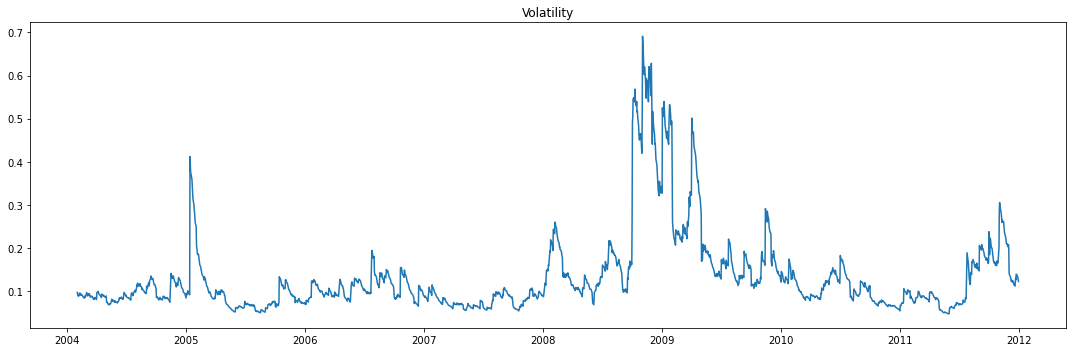

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(data.index, fit / 100)
plt.title('Volatility')
plt.tight_layout()
plt.show()

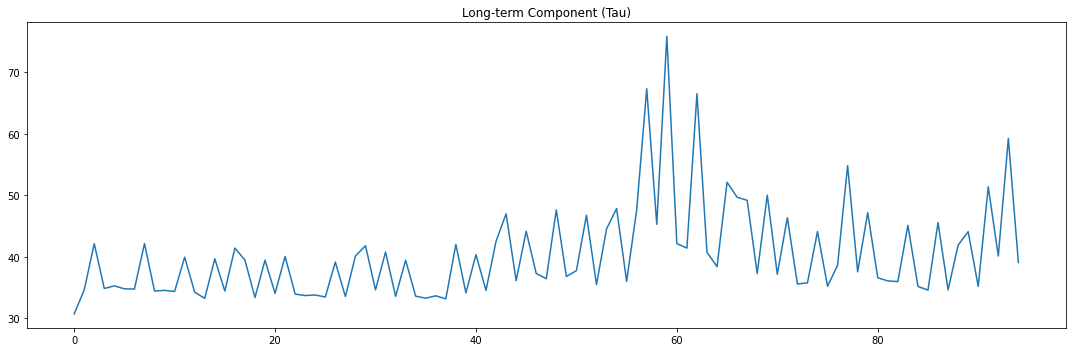

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(model.tau)
plt.title('Long-term Component (Tau)')
plt.tight_layout()
plt.show()